# In this notebook I compute the correlation function of the $D_{ls}$ and  $\textit{pseudo} D_{ls}$. The CAMB correlation function are required in both cases

Firs, I need compute the $C_{ls}$ (really $[Cl*l*(l+1)/2/\pi]*[(10⁶)²] = Dl$) to input in camb correlations function. CMB maps are required in all cases. I will take for full sky map a COM_CMB_IQU-smica_2048_R3.00_hm2 cmb map (https://pla.esac.esa.int/), a cut sky with mask where put 0 in contamination regions and 1 and the others. The correlatión function will be bounded with the dispertion of the synthetic cmb maps made by healpy using camb'Dls

1.$\textbf{I compute and plot the correlations functions of the CMB of  using \Lambda CDM parameters (Planck colaboration 2018).
For this propose I use the python library CAMB(Lewis et al. 2016)}.$

In [2]:
# Importing libraries
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [3]:
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower, correlations
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /home/augusto/anaconda3/envs/CMB/lib/python3.10/site-packages/camb


In [4]:
#Calculate results for specified parameters and return CAMBdata instance for getting results.
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.66, ombh2=0.02242, omch2=0.11933, mnu=0.06, omk=0.001, tau=0.0561)
pars.InitPower.set_params(As=2.105e-9, ns=0.9665, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [5]:
#calculate results for these parameters
results = camb.get_results(pars)

In [6]:
#Set all CAMB parameters at once, including parameters which are part of the CAMBparams structure, as well as global parameters.
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [7]:
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])

(2551, 4)


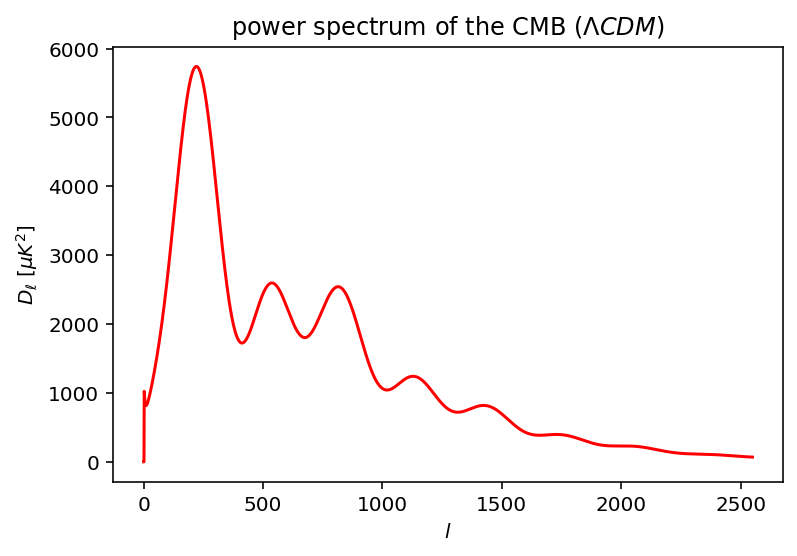

In [8]:
# plot the Dl
plt.plot(ls, totCL[:,0], color='r')
plt.xlabel(r'$l$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.title('power spectrum of the CMB ($\Lambda CDM$)')
plt.show()

(0.0, 4.0)

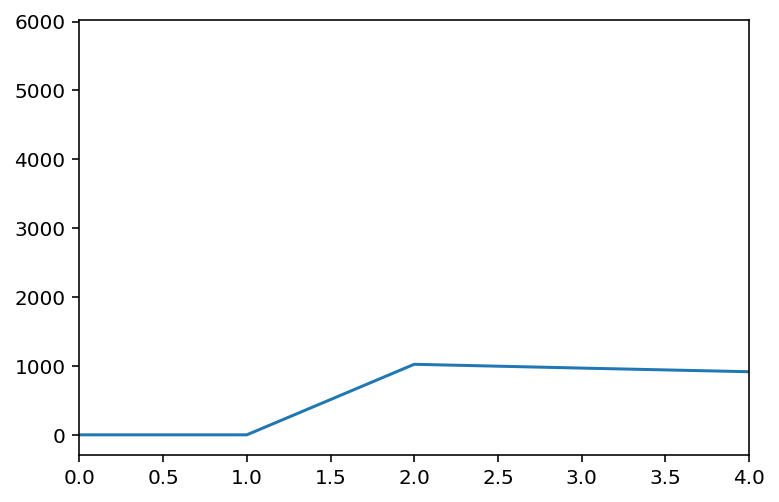

In [9]:
plt.plot(ls,totCL[:,0])
plt.xlim(0,4)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

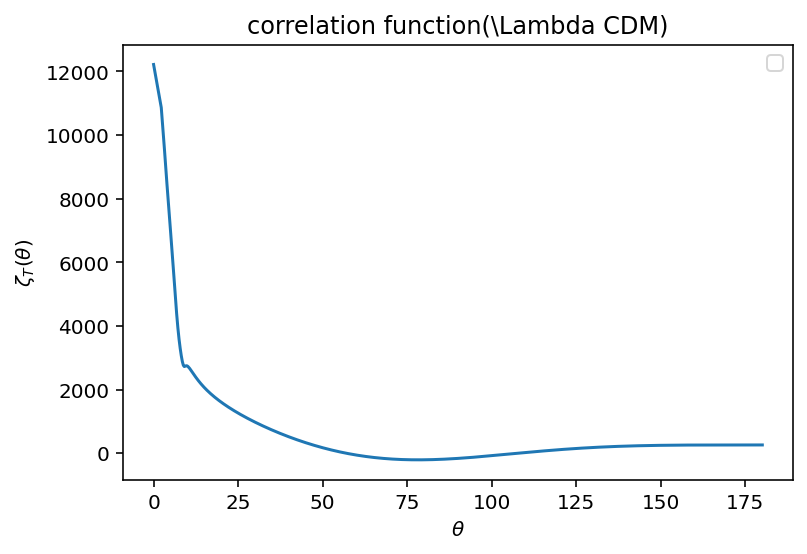

In [10]:
# YI use CAMB to calculate CMB correlation functions
corrs, xvals, weights = correlations.gauss_legendre_correlation(totCL)
xvals=np.linspace(-1,1,2551)
r=np.arccos(xvals)*180/np.pi # sampled theta values in degrees
plt.plot(r, corrs[:,0])
plt.ylabel(r'$\zeta_{T}(\theta)$')
plt.xlabel(r'$\theta$')
plt.legend()
plt.title('correlation function(\Lambda CDM)')
plt.show



2. $\textbf{We used several data products from the Planck 2018
data release.1 We used the Planck SMICA component
separation maps, both full mission and half mission
(HM) maps2
, in our analyses.\\
I  download the COM_CMB_IQU-smica_2048_R3.00_hm2 CMB map (https://pla.esac.esa.int/) and with the help of healpix I will compute.\\
\\the power spectrum of the CMB. Then with CAMB I will compute the correlations function.}$

In [11]:
# import healpy
import healpy as hp

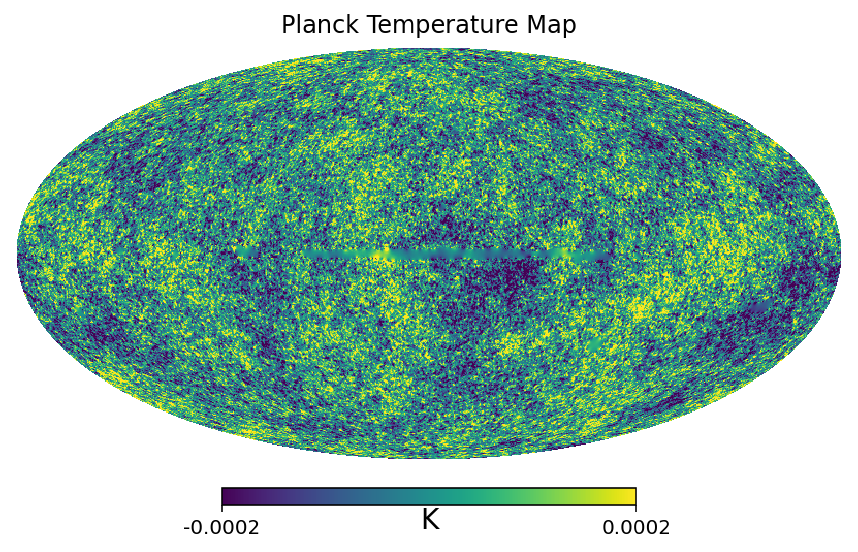

In [12]:
planck_IQU_SMICA=hp.read_map('/home/augusto/Descargas/COM_CMB_IQU-smica_2048_R3.00_hm2.fits')
fig=plt.figure(1)
hp.mollview(planck_IQU_SMICA, min=-0.0002,max=0.0002,
title='Planck Temperature Map',fig=1,unit='K')

Compute the $C_{ls}$ with anafast healpy routine

In [13]:
nside = 2048
lmax=2500
Cl = hp.anafast(planck_IQU_SMICA, lmax= lmax)
l=np.arange(len(Cl))

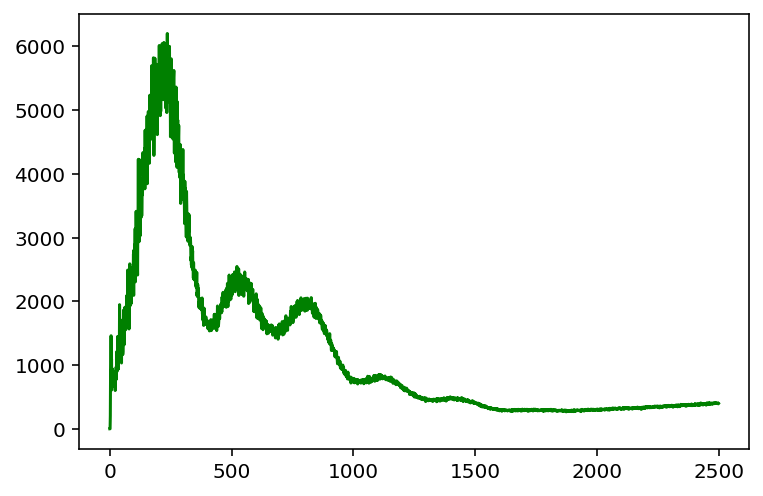

In [14]:
Dl=Cl*l*(l+1)*(1e12)/2/np.pi
plt.plot(l, Dl, color='g')

In [15]:
# component y(2) and y(3)
Dl[3]

918.9783866182479

(0.0, 4.0)

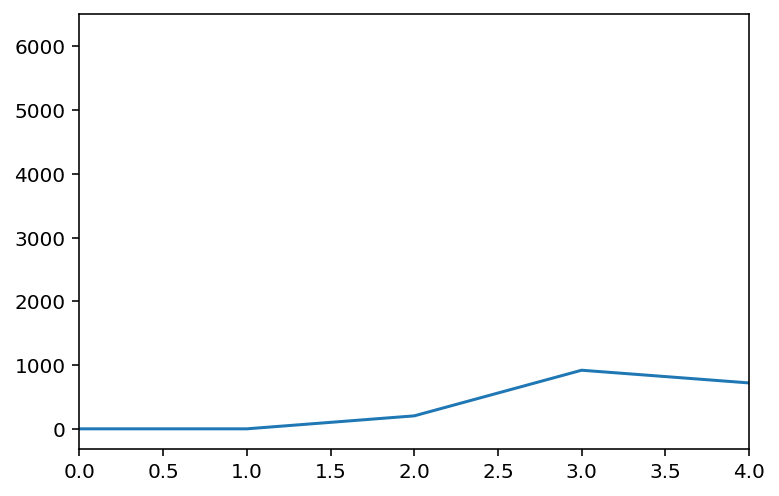

In [16]:
plt.plot(l,Dl)

plt.xlim(0,4)

Compute the correlation function $\zeta_{T1}(\theta)$'

First I must make an arry with dimension four columns

In [17]:
D_l=np.zeros((len(Dl),4))
D_l[:,0]=Dl
D_l.shape

(2501, 4)

In [18]:

corr1, xvals, weights = correlations.gauss_legendre_correlation(D_l) 
xvals1=np.linspace(-1,1,2501)
r1=np.arccos(xvals1)*180/np.pi # sampled theta values in degrees

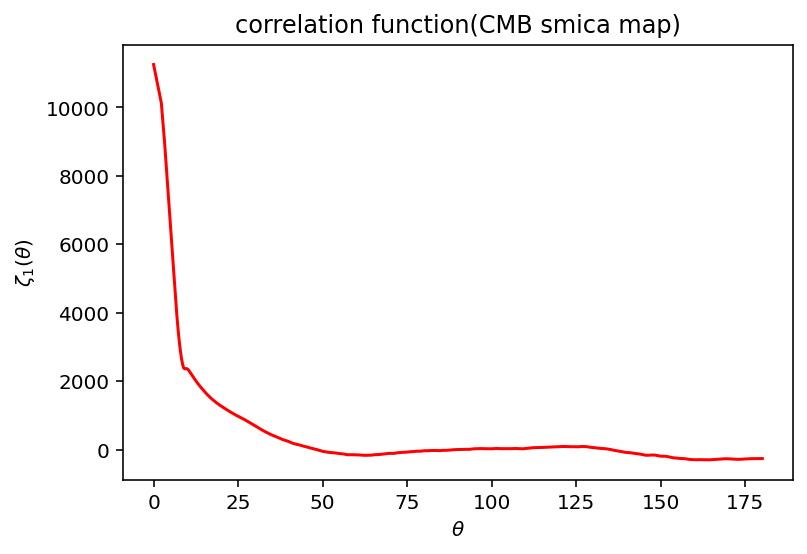

In [19]:
plt.plot(r1, corr1[:,0], color = 'r')
plt.ylabel(r'$\zeta_{1}(\theta)$')
plt.xlabel(r'$\theta$')
#plt.legend()
plt.title('correlation function(CMB smica map)')
plt.show()


3. $$\textbf{Because the residual contaminations of the milky way and dust we can't mesaure in that regions. Then we put a mask with 0 and 1. I compute the \textit{pseudo} $C_{ls}$ with namaster python routine.}$$

In [20]:
#import pymaster
import pymaster as nmt

We downloaded the COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits -- Temperature confidence mask with fsky = 77.9%.

In [21]:
mask=hp.read_map('/home/augusto/cmblss/data/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')

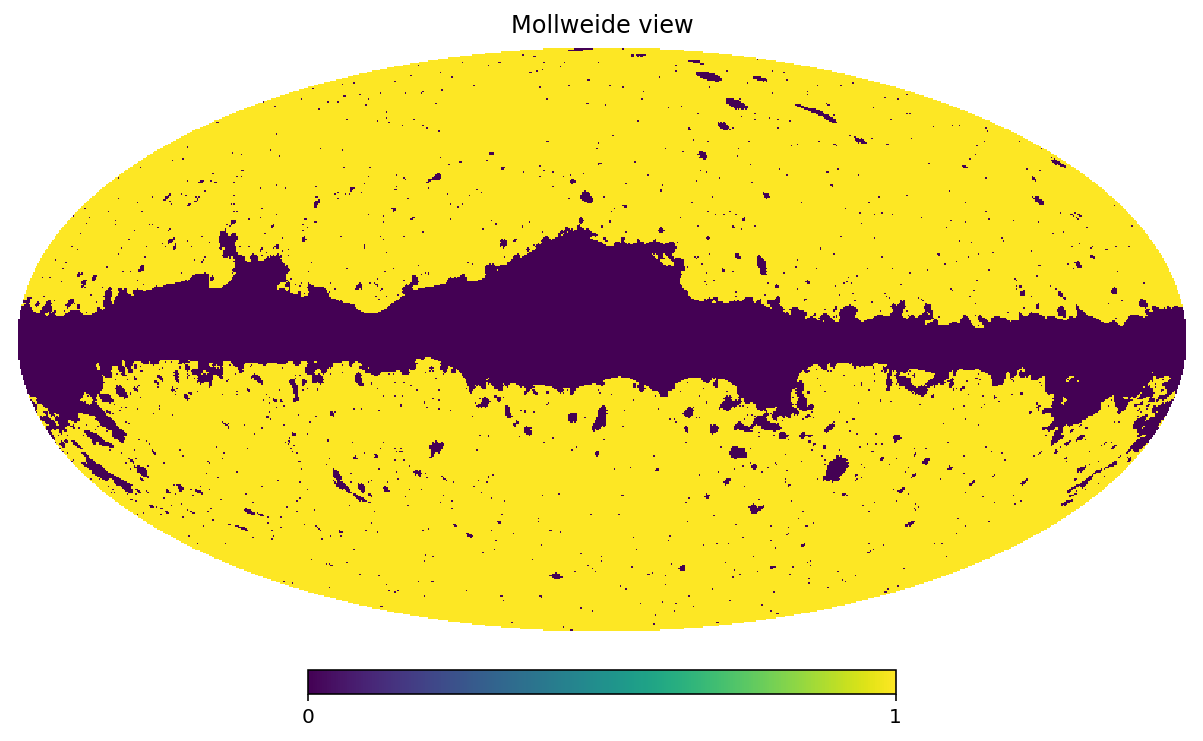

In [22]:
hp.mollview(mask)
plt.show()

In [23]:
# HEALPix resolution parameter used here
nside = 2048

In [24]:
# An NmtField object contains all the information describing the fields to correlate, including their observed maps, masks and contaminant templates.
f_0=nmt.NmtField(mask, [planck_IQU_SMICA])

In [25]:
# Initialize binning scheme with 4 ells per bandpower
# Convenience constructor for HEALPix maps with linear binning.
b = nmt.NmtBin.from_nside_linear(nside, 4)

In [26]:
# Compute MASTER estimator
# spin-0 x spin-0
#Computes the full MASTER estimate of the power spectrum of two fields (f1 and f2). 
cl_00 = nmt.compute_full_master(f_0, f_0, b)

In [27]:
# Shape of the pseudo Cls
cl_00.shape
cl_00[0]


array([2.17561436e-10, 7.35844194e-11, 3.20879069e-11, ...,
       1.28760109e-18, 1.37457963e-18, 1.56123462e-18])

In [28]:
#Returns an array with the effective multipole associated to each bandpower. 
#These are computed as a weighted average of the multipoles within each bandpower.
el = b.get_effective_ells()
el.shape
el



array([3.5000e+00, 7.5000e+00, 1.1500e+01, ..., 6.1315e+03, 6.1355e+03,
       6.1395e+03])

(0.0, 2500.0)

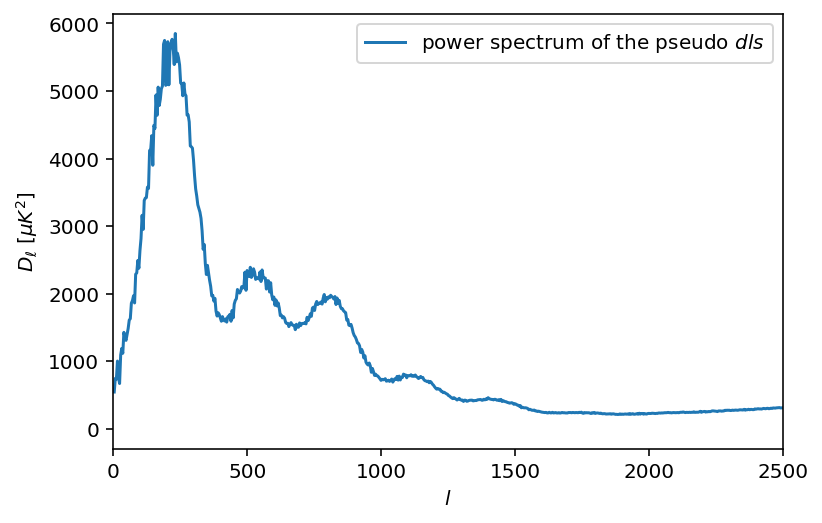

In [31]:
#plot results
dl=cl_00[0]*[(1e6)**(2)]*el*(el+1)/2/np.pi
plt.plot(el,dl, label='power spectrum of the pseudo $dls$')
plt.legend()
plt.xlabel(r'$l$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.xlim(0,2500)

In [32]:
# Interpolation of the pseudo Dls
from scipy.interpolate import interp1d

In [33]:
# I define the interpolation with x**3
f=interp1d(el, dl, kind='cubic') 

In [34]:
# I define my news l
lnew=np.linspace(4, 2500, 2498)
# oncatenate

#pdl is the interpolation of the pseudo Dls
pdl_int=f(lnew)
lnew.shape

(2498,)

In [35]:
# Concatenate the ls
ljoin=np.concatenate((([2,3]),lnew))
# Concatenate the pseudo Dls
pDl_=np.concatenate((([203.36331868506028,918.9783866182479]),pdl_int ))


(0.0, 10.0)

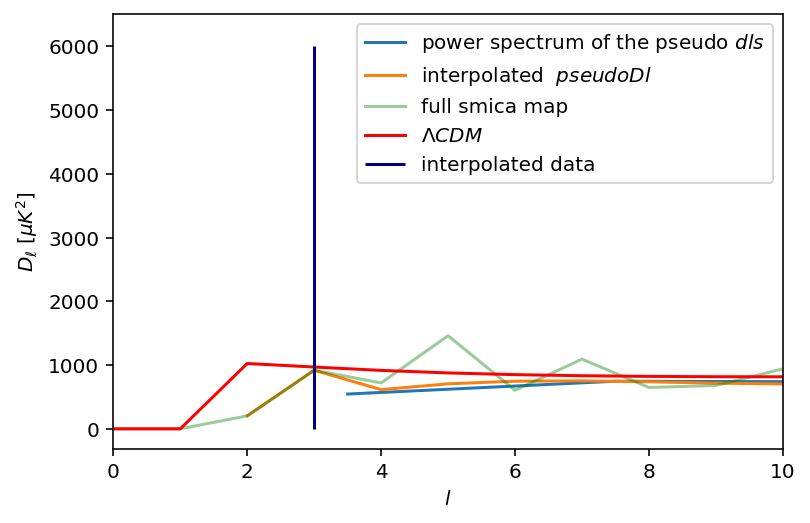

In [44]:
# plotting

plt.plot(el,dl, label='power spectrum of the pseudo $dls$')
plt.plot(ljoin, pDl_, label='interpolated  $pseudoDl$')
plt.plot(l, Dl, color='g', alpha=0.4, label='full smica map')
plt.plot(ls, totCL[:,0], color='r', label= '$\Lambda CDM$')
plt.vlines(x=3, ymin=0, ymax=6000, colors='darkblue', label='interpolated data')
plt.legend()
plt.xlabel(r'$l$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.xlim(0,10)

(0.0, 4.0)

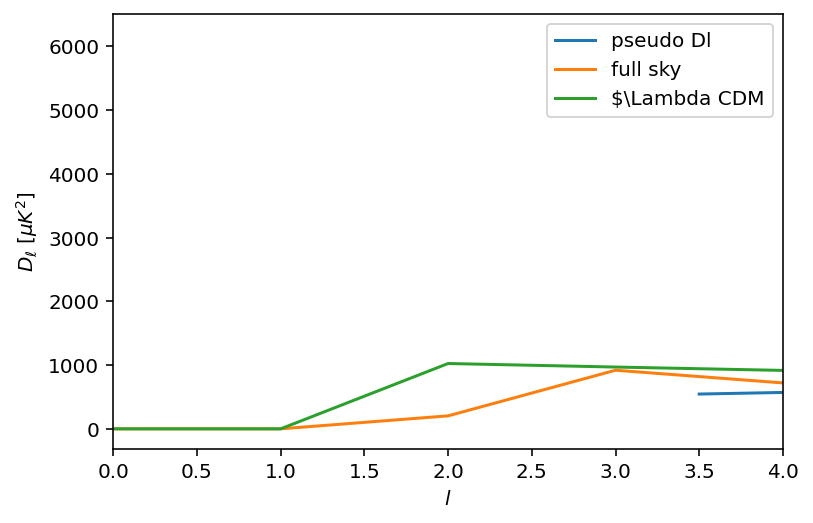

In [34]:
plt.plot(el, dl, label='pseudo Dl')
plt.plot(l, Dl, label='full sky')
plt.plot(ls,totCL[:,0], label ='$\Lambda CDM')
plt.legend()
plt.xlabel(r'$l$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.xlim(0,4)

a. $ \textbf{I compute the correlation function $\zeta (\theta)$ of the pseudo $D_l$}$

In [35]:
pDl_.shape

(2500,)

In [36]:
Dl=np.ones((len(pDl_),4))
Dl[:,0]=pDl_
Dl.shape

(2500, 4)

In [37]:
corr2, xvals, weights = correlations.gauss_legendre_correlation(Dl) 
xvals2=np.linspace(-1,1,2500)
r2=np.arccos(xvals2)*180/np.pi # sampled theta values in degrees

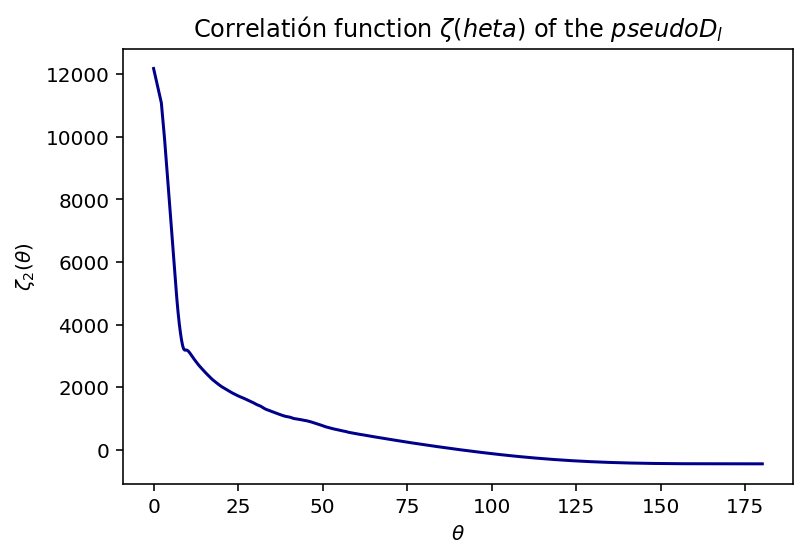

In [38]:
plt.plot(r2, corr2[:,0], color = 'darkblue')
plt.ylabel(r'$\zeta_{2}(\theta)$')
plt.xlabel(r'$\theta$')
plt.title('Correlatión function $\zeta (\theta)$ of the $pseudo D_{l}$')
plt.show()

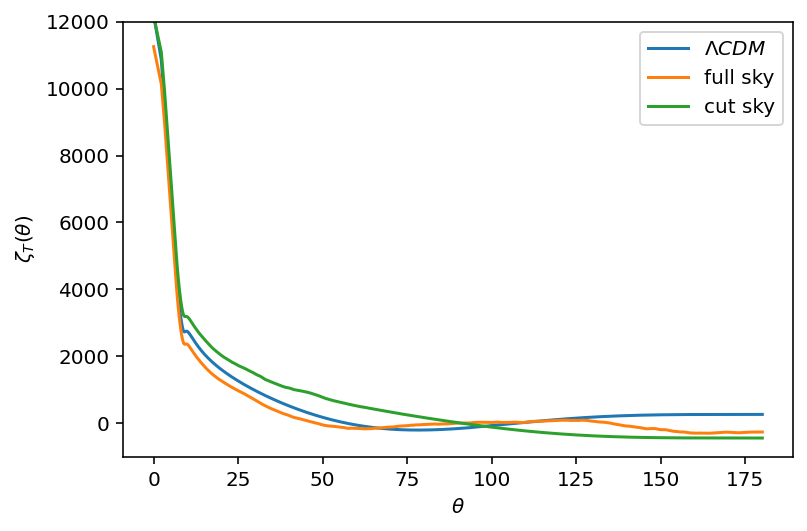

In [39]:
# We put together all correlation function
plt.plot(r, corrs[:,0], label='$\Lambda CDM $')
plt.plot(r1, corr1[:,0], label ='full sky')
plt.plot(r2, corr2[:,0], label = 'cut sky')
plt.ylabel(r'$\zeta_{T}(\theta)$')
plt.xlabel(r'$\theta$')
plt.ylim(-1000,12000)
plt.legend(loc='best')


4. $\textbf{In this section we are going to compute the errors. This will be done generating 20 cmb maps with theoretical $D_{ls}$ supplied by $\Lambda CDM$ throughout CAMB and Healpy python routine.}$

In [43]:
# Generating 20 cmb maps
lmax = 2500
nside=2048
mapa_cl_1 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_2 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_3 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_4 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_5 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_6 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_7 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_8 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_9 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_10 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_11 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_12 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_13 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_14 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_15= hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_16 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_17 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_18 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_19 = hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))
mapa_cl_20= hp.sphtfunc.synfast(totCL[:,0], nside=nside, lmax =lmax, fwhm=np.radians(5/60))


In [44]:
# Computing the Dls with anafast healpy library
lmax = 2500
cl1=hp.anafast(mapa_cl_1, lmax=lmax)
cl2=hp.anafast(mapa_cl_2, lmax=lmax)
cl3=hp.anafast(mapa_cl_3, lmax=lmax)
cl4=hp.anafast(mapa_cl_4, lmax=lmax)
cl5=hp.anafast(mapa_cl_5, lmax=lmax)
cl6=hp.anafast(mapa_cl_6, lmax=lmax)
cl7=hp.anafast(mapa_cl_7, lmax=lmax)
cl8=hp.anafast(mapa_cl_8, lmax=lmax)
cl9=hp.anafast(mapa_cl_9, lmax=lmax)
cl10=hp.anafast(mapa_cl_10, lmax=lmax)
cl11=hp.anafast(mapa_cl_11, lmax=lmax)
cl12=hp.anafast(mapa_cl_12, lmax=lmax)
cl13=hp.anafast(mapa_cl_13, lmax=lmax)
cl14=hp.anafast(mapa_cl_14, lmax=lmax)
cl15=hp.anafast(mapa_cl_15, lmax=lmax)
cl16=hp.anafast(mapa_cl_16, lmax=lmax)
cl17=hp.anafast(mapa_cl_17, lmax=lmax)
cl18=hp.anafast(mapa_cl_18, lmax=lmax)
cl19=hp.anafast(mapa_cl_19, lmax=lmax)
cl20=hp.anafast(mapa_cl_20, lmax=lmax)


In [45]:
# We make our functional arrays. All are required to input in in correlations.gauss_legendre_correlation
cl1_ = np.ones((len(cl1),4))
cl2_ =np.ones((len(cl2),4))
cl3_ = np.ones((len(cl3),4))
cl4_ =np.ones((len(cl4),4))
cl5_ = np.ones((len(cl5),4))
cl6_ =np.ones((len(cl6),4))
cl7_ = np.ones((len(cl7),4))
cl8_ =np.ones((len(cl8),4))
cl9_ = np.ones((len(cl9),4))
cl10_ =np.ones((len(cl10),4))
cl11_ = np.ones((len(cl11),4))
cl12_ =np.ones((len(cl12),4))
cl13_ = np.ones((len(cl13),4))
cl14_ =np.ones((len(cl14),4))
cl15_ = np.ones((len(cl15),4))
cl16_ =np.ones((len(cl16),4))
cl17_ = np.ones((len(cl17),4))
cl18_ =np.ones((len(cl18),4))
cl19_ = np.ones((len(cl19),4))
cl20_ =np.ones((len(cl20),4))

cl1_[:,0] = cl1
cl2_[:,0] = cl2
cl3_[:,0] = cl3
cl4_[:,0] = cl4
cl5_[:,0] = cl5
cl6_[:,0] = cl6
cl7_[:,0] = cl7
cl8_[:,0] = cl8
cl9_[:,0] = cl9
cl10_[:,0] = cl10
cl12_[:,0] = cl12
cl13_[:,0] = cl13
cl14_[:,0] = cl14
cl15_[:,0] = cl15
cl16_[:,0] = cl16
cl17_[:,0] = cl17
cl18_[:,0] = cl18
cl19_[:,0] = cl19
cl20_[:,0] = cl20

In [46]:
# Computing the correlations of this function to enclose the erros.
corr_1, xvals, weights = correlations.gauss_legendre_correlation(cl1_)
corr_2, xvals, weights = correlations.gauss_legendre_correlation(cl2_)
corr_3, xvals, weights = correlations.gauss_legendre_correlation(cl3_)
corr_4, xvals, weights = correlations.gauss_legendre_correlation(cl4_)
corr_5, xvals, weights = correlations.gauss_legendre_correlation(cl5_)
corr_6, xvals, weights = correlations.gauss_legendre_correlation(cl6_)
corr_7, xvals, weights = correlations.gauss_legendre_correlation(cl7_)
corr_8, xvals, weights = correlations.gauss_legendre_correlation(cl8_)
corr_9, xvals, weights = correlations.gauss_legendre_correlation(cl9_)
corr_10, xvals, weights = correlations.gauss_legendre_correlation(cl10_)
corr_11, xvals, weights = correlations.gauss_legendre_correlation(cl11_)
corr_12, xvals, weights = correlations.gauss_legendre_correlation(cl12_)
corr_13, xvals, weights = correlations.gauss_legendre_correlation(cl13_)
corr_14, xvals, weights = correlations.gauss_legendre_correlation(cl14_)
corr_15, xvals, weights = correlations.gauss_legendre_correlation(cl15_)
corr_16, xvals, weights = correlations.gauss_legendre_correlation(cl16_)
corr_17, xvals, weights = correlations.gauss_legendre_correlation(cl17_)
corr_18, xvals, weights = correlations.gauss_legendre_correlation(cl18_)
corr_19, xvals, weights = correlations.gauss_legendre_correlation(cl19_)
corr_20, xvals, weights = correlations.gauss_legendre_correlation(cl20_)

# Define the  intervals 
xvals_1=np.linspace(-1,1,2501)
xvals_2=np.linspace(-1,1,2501)
xvals_3=np.linspace(-1,1,2501)
xvals_4=np.linspace(-1,1,2501)
xvals_5=np.linspace(-1,1,2501)
xvals_6=np.linspace(-1,1,2501)
xvals_7=np.linspace(-1,1,2501)
xvals_8=np.linspace(-1,1,2501)
xvals_9=np.linspace(-1,1,2501)
xvals_10=np.linspace(-1,1,2501)
xvals_11=np.linspace(-1,1,2501)
xvals_12=np.linspace(-1,1,2501)
xvals_13=np.linspace(-1,1,2501)
xvals_14=np.linspace(-1,1,2501)
xvals_15=np.linspace(-1,1,2501)
xvals_16=np.linspace(-1,1,2501)
xvals_17=np.linspace(-1,1,2501)
xvals_18=np.linspace(-1,1,2501)
xvals_19=np.linspace(-1,1,2501)
xvals_20=np.linspace(-1,1,2501)

# sampled theta values in degrees
r_1=np.arccos(xvals_1)*180/np.pi
r_2=np.arccos(xvals_2)*180/np.pi
r_3=np.arccos(xvals_3)*180/np.pi
r_4=np.arccos(xvals_4)*180/np.pi
r_5=np.arccos(xvals_5)*180/np.pi
r_6=np.arccos(xvals_6)*180/np.pi
r_7=np.arccos(xvals_7)*180/np.pi
r_8=np.arccos(xvals_8)*180/np.pi
r_9=np.arccos(xvals_9)*180/np.pi
r_10=np.arccos(xvals_10)*180/np.pi
r_11=np.arccos(xvals_11)*180/np.pi
r_12=np.arccos(xvals_12)*180/np.pi
r_13=np.arccos(xvals_13)*180/np.pi
r_14=np.arccos(xvals_14)*180/np.pi
r_15=np.arccos(xvals_15)*180/np.pi
r_16=np.arccos(xvals_16)*180/np.pi
r_17=np.arccos(xvals_17)*180/np.pi
r_18=np.arccos(xvals_18)*180/np.pi
r_19=np.arccos(xvals_19)*180/np.pi
r_20=np.arccos(xvals_20)*180/np.pi

In [47]:
# I make un array to compute the media and standard deviation of the correlations functions
c=np.array([corr_1[:,0],corr_2[:,0],corr_3[:,0],corr_4[:,0],corr_5[:,0], corr_6[:,0], corr_7[:,0], corr_8[:,0],corr_9[:,0],corr_10[:,0], corr_11[:,0], corr_12[:,0], corr_13[:,0],corr_14[:,0], corr_15[:,0], corr_16[:,0], corr_17[:,0], corr_18[:,0], corr_19[:,0], corr_20[:,0]])

In [48]:
c.shape

(20, 2501)

In [49]:
sigma = np.std(c,axis=0)
media = np.mean(c,axis=0)

In [50]:
sigma.shape

(2501,)

(-1000.0, 5000.0)

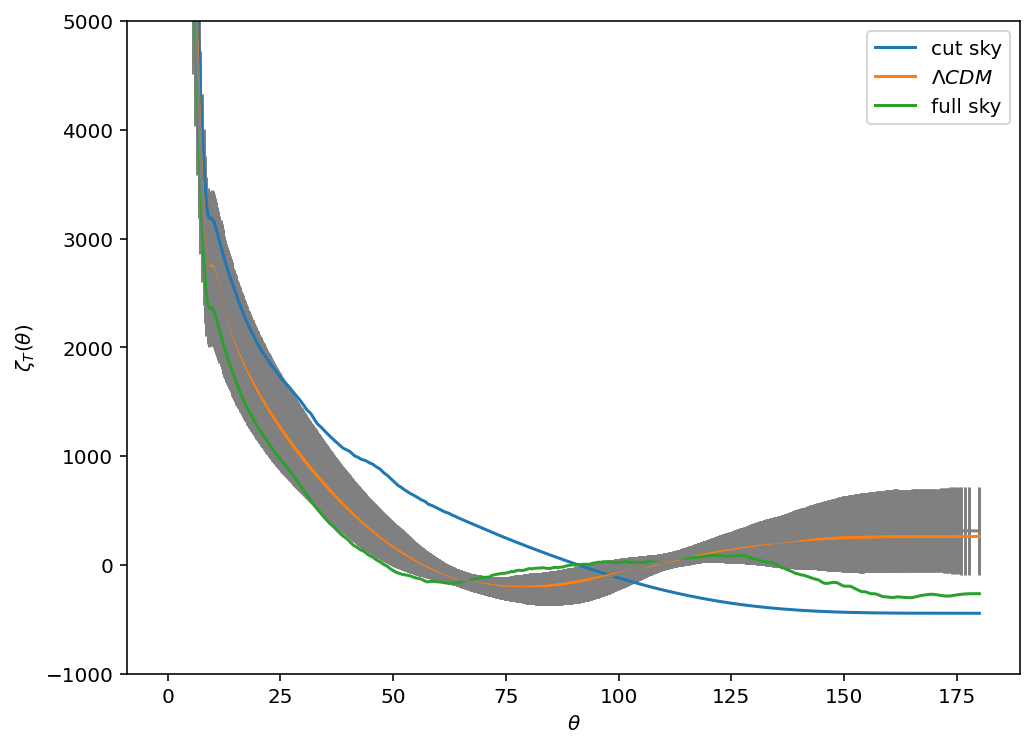

In [53]:
# Plotting the results
plt.figure(figsize=(8,6))
plt.errorbar(r_1,media, yerr=sigma, color= 'grey')
plt.plot(r2, corr2[:,0], label = 'cut sky')
plt.plot(r, corrs[:,0], label='$\Lambda CDM $')
plt.plot(r1, corr1[:,0], label ='full sky')
#plt.plot(r2_1, corr2_1[:,0], label = 'cut sky')
plt.ylabel(r'$\zeta_{T}(\theta)$')
plt.xlabel(r'$\theta$')
plt.legend(loc='best')

plt.ylim(-1000,5000)

 5. $\textbf{In this section we are downloanding cmb's mask from https://lambda.gsfc.nasa.gov/product/wmap/dr5/masks_info.html.\\
 a. We use the wmap_temperature_kq75_analysis_mask_r9_9yr_v5 mask. }$

In [54]:
# mask with nside=512 and resolution 9
mask_1=hp.read_map('/home/augusto/cmblss/data/wmap_temperature_kq75_analysis_mask_r9_9yr_v5.fits')

In [55]:
# Return the nside of a map
hp.get_nside(mask_1)

512

In [56]:
# Resolution of the mask
hp.nside2order(512)

9

In [57]:
# Resolution of the map
hp.get_nside(planck_IQU_SMICA)

2048

In [58]:
hp.nside2order(2048)

11

In [59]:
# Degrade the map
map_smica= hp.pixelfunc.ud_grade(planck_IQU_SMICA, 256)

In [60]:
# Degrade the mask
mask_1=hp.pixelfunc.ud_grade(mask_1,256)

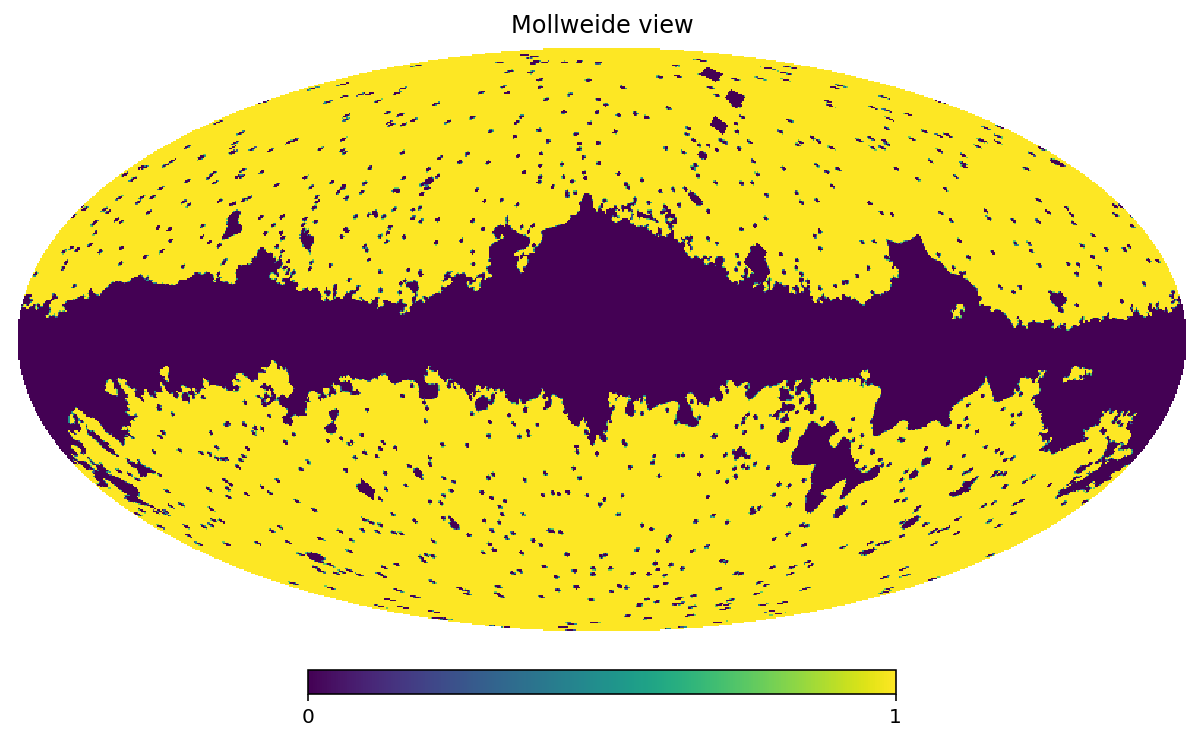

In [61]:
hp.mollview(mask_1)
plt.show()

In [62]:
# HEALPix resolution parameter used here
nside = 256

In [63]:
# An NmtField object contains all the information describing the fields to correlate, including their observed maps, masks and contaminant templates.
t_0=nmt.NmtField(mask_1, [map_smica])

In [64]:
# Initialize binning scheme with 4 ells per bandpower
# Convenience constructor for HEALPix maps with linear binning.
b_1 = nmt.NmtBin.from_nside_linear(nside, 4)

In [65]:
# Compute MASTER estimator
# spin-0 x spin-0
#Computes the full MASTER estimate of the power spectrum of two fields (f1 and f2). 
cl_10 = nmt.compute_full_master(t_0, t_0, b_1)

In [66]:
cl_10.shape 

(1, 191)

In [68]:
#Returns an array with the effective multipole associated to each bandpower. 
#These are computed as a weighted average of the multipoles within each bandpower.
el_1 = b_1.get_effective_ells()
el_1.shape
#el_1


(191,)

(0.0, 2500.0)

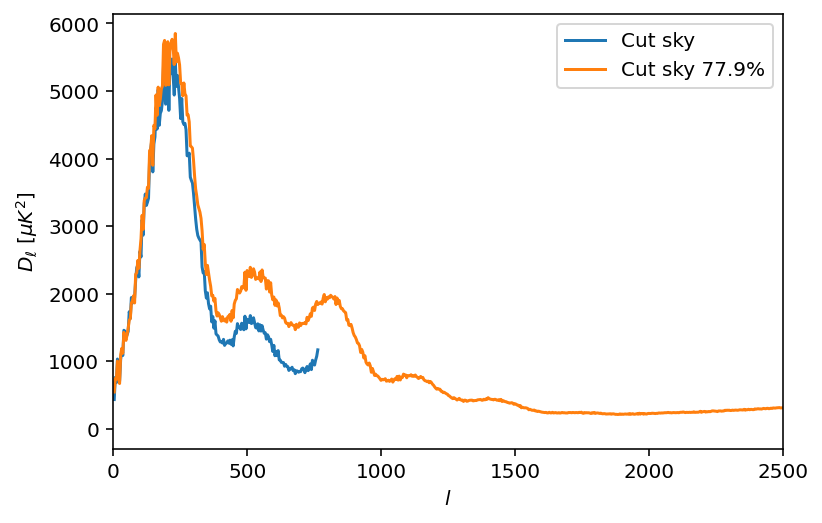

In [70]:
#plot results
d1l=cl_10[0]*[(1e6)**(2)]*el_1*(el_1+1)/2/np.pi
plt.plot(el_1, d1l, label ='Cut sky ')
plt.plot(el,dl, label='Cut sky 77.9%')
plt.legend()
plt.xlabel(r'$l$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.xlim(0,2500)

In [71]:
# Interpolation of the pseudo Dls
# I define the interpolation with x**3
f=interp1d(el_1, d1l, kind='cubic') 

In [87]:
D1l=np.zeros((len(d1l),4))

In [88]:
D1l.shape

(191, 4)

In [89]:
D1l[:,0]=d1l

In [91]:
corr_, xvals, weights = correlations.gauss_legendre_correlation(D1l) 
xvals_=np.linspace(-1,1,191)
r_=np.arccos(xvals_)*180/np.pi # sampled theta values in degrees

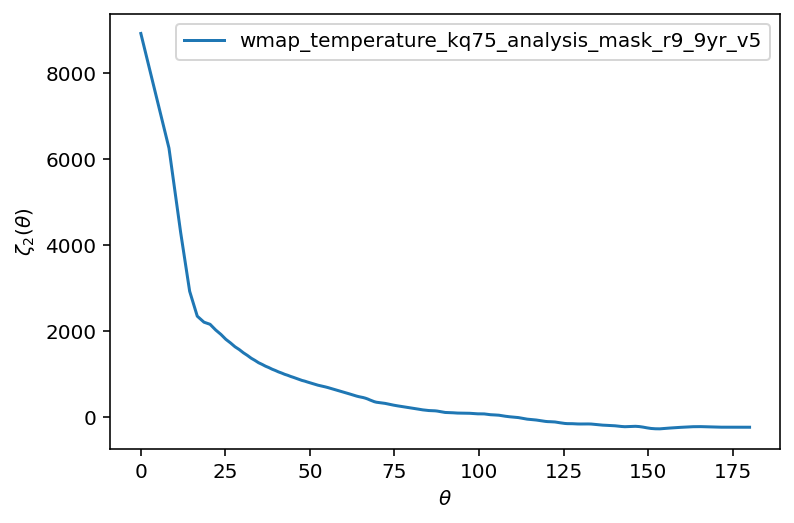

In [93]:
# Plol the results
plt.plot(r_, corr_[:,0], label = 'wmap_temperature_kq75_analysis_mask_r9_9yr_v5')
plt.ylabel(r'$\zeta_{2}(\theta)$')
plt.xlabel(r'$\theta$')
plt.legend(loc='best')

b. $\textbf{ We use the wmap_temperature_kq85_analysis_mask_r9_9yr_v5.fits
mask.\\}$

In [94]:
# Read the mask
mask_2=hp.read_map('/home/augusto/cmblss/data/wmap_temperature_kq85_analysis_mask_r9_9yr_v5.fits')

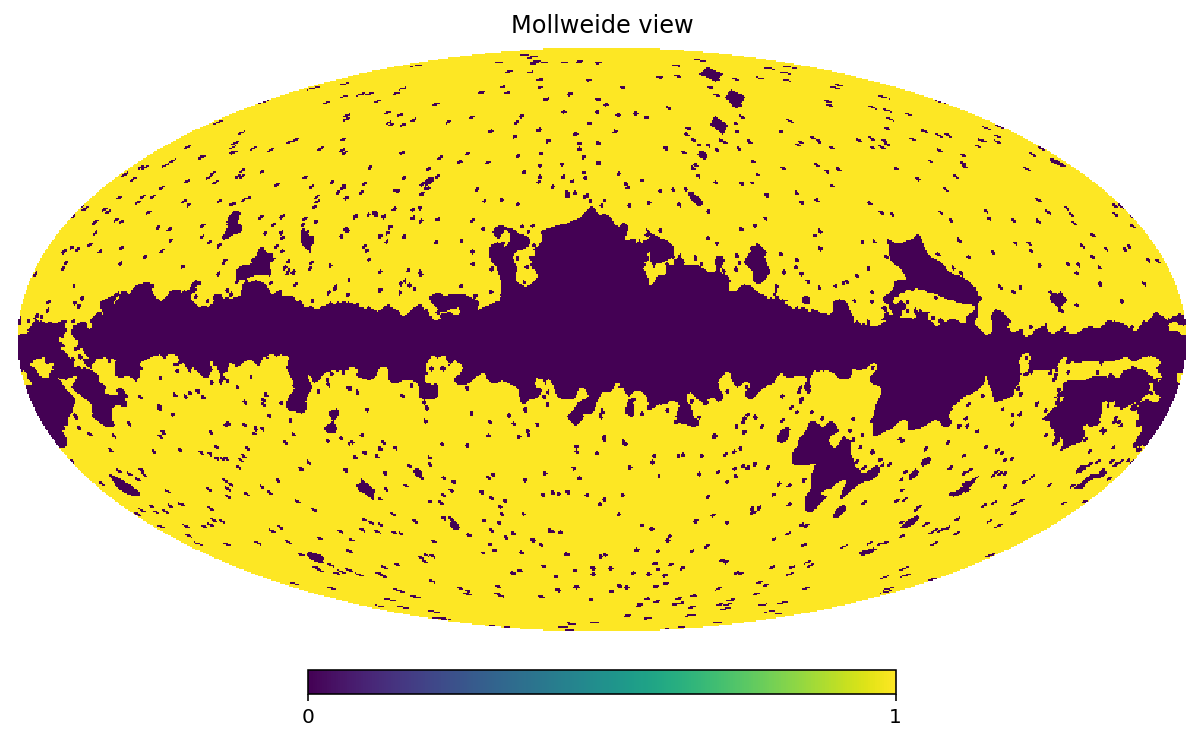

In [95]:
hp.mollview(mask_2)
plt.show()

In [96]:
# Resolution 
hp.get_nside(mask_2)

512

In [103]:
# Degrade the mask  until nside=256
mask_2=hp.pixelfunc.ud_grade(mask_2,256)

In [104]:
# HEALPix resolution parameter used here
nside = 256

In [106]:
# An NmtField object contains all the information describing the fields to correlate, including their observed maps, masks and contaminant templates.
t_2=nmt.NmtField(mask_2, [map_smica])

In [107]:
# Initialize binning scheme with 4 ells per bandpower
# Convenience constructor for HEALPix maps with linear binning.
b_2= nmt.NmtBin.from_nside_linear(nside, 4)

In [108]:
# Compute MASTER estimator
# spin-0 x spin-0
#Computes the full MASTER estimate of the power spectrum of two fields (f1 and f2). 
cl_20 = nmt.compute_full_master(t_2, t_2, b_2)

In [109]:
#Returns an array with the effective multipole associated to each bandpower. 
#These are computed as a weighted average of the multipoles within each bandpower.
el_2 = b_2.get_effective_ells()
el_2.shape
el_2

array([  3.5,   7.5,  11.5,  15.5,  19.5,  23.5,  27.5,  31.5,  35.5,
        39.5,  43.5,  47.5,  51.5,  55.5,  59.5,  63.5,  67.5,  71.5,
        75.5,  79.5,  83.5,  87.5,  91.5,  95.5,  99.5, 103.5, 107.5,
       111.5, 115.5, 119.5, 123.5, 127.5, 131.5, 135.5, 139.5, 143.5,
       147.5, 151.5, 155.5, 159.5, 163.5, 167.5, 171.5, 175.5, 179.5,
       183.5, 187.5, 191.5, 195.5, 199.5, 203.5, 207.5, 211.5, 215.5,
       219.5, 223.5, 227.5, 231.5, 235.5, 239.5, 243.5, 247.5, 251.5,
       255.5, 259.5, 263.5, 267.5, 271.5, 275.5, 279.5, 283.5, 287.5,
       291.5, 295.5, 299.5, 303.5, 307.5, 311.5, 315.5, 319.5, 323.5,
       327.5, 331.5, 335.5, 339.5, 343.5, 347.5, 351.5, 355.5, 359.5,
       363.5, 367.5, 371.5, 375.5, 379.5, 383.5, 387.5, 391.5, 395.5,
       399.5, 403.5, 407.5, 411.5, 415.5, 419.5, 423.5, 427.5, 431.5,
       435.5, 439.5, 443.5, 447.5, 451.5, 455.5, 459.5, 463.5, 467.5,
       471.5, 475.5, 479.5, 483.5, 487.5, 491.5, 495.5, 499.5, 503.5,
       507.5, 511.5,

(0.0, 2500.0)

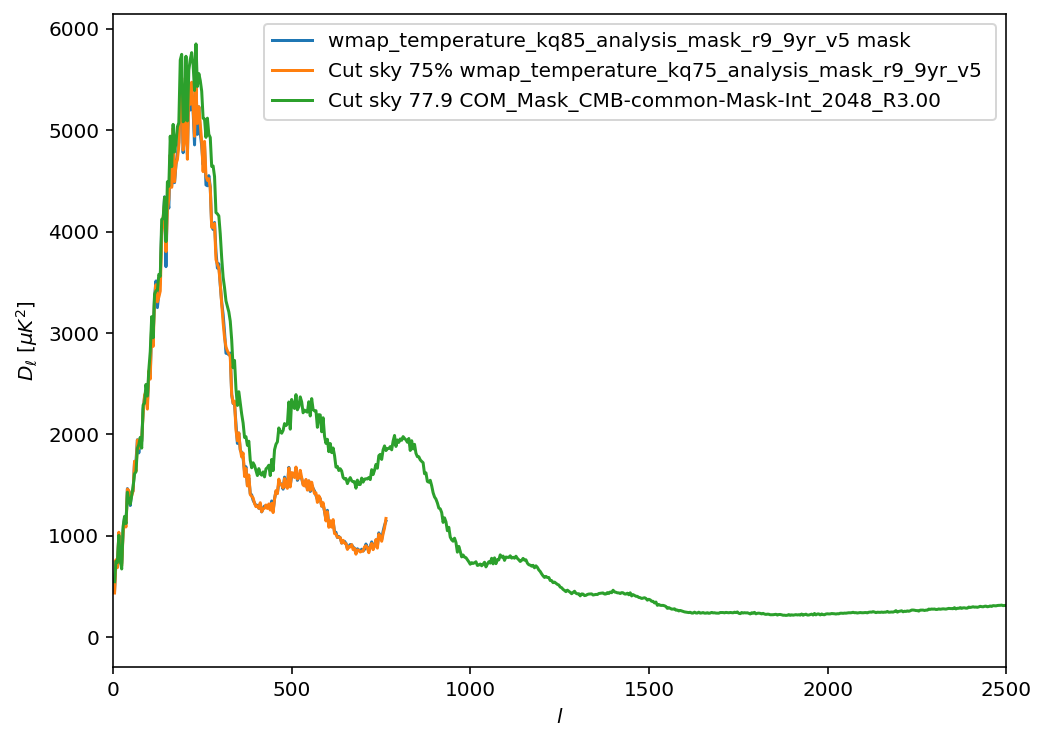

In [113]:
#plot results
d2l=cl_20[0]*[(1e6)**(2)]*el_1*(el_1+1)/2/np.pi
#size plot
plt.figure(figsize=(8,6)) 
plt.plot(el_2,d2l, label ='wmap_temperature_kq85_analysis_mask_r9_9yr_v5 mask')
plt.plot(el_1, d1l, label ='Cut sky 75% wmap_temperature_kq75_analysis_mask_r9_9yr_v5 ')
plt.plot(el,dl, label='Cut sky 77.9 COM_Mask_CMB-common-Mask-Int_2048_R3.00')
plt.legend(loc ='best')
plt.xlabel(r'$l$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.xlim(0,2500)

In [114]:
# computing the correlation function
D2l=np.ones((len(d2l),4))
D2l[:,0]=d2l
D2l.shape

(191, 4)

In [115]:
corr_2, xvals, weights = correlations.gauss_legendre_correlation(D2l) 
xvals_=np.linspace(-1,1,191)
r_=np.arccos(xvals_)*180/np.pi # sampled theta values in degrees

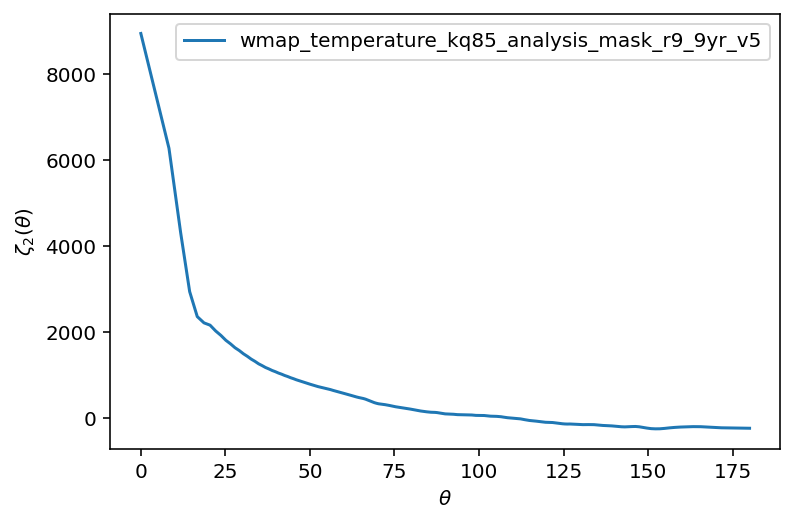

In [117]:
plt.plot(r_, corr_2[:,0], label = 'wmap_temperature_kq85_analysis_mask_r9_9yr_v5')
plt.ylabel(r'$\zeta_{2}(\theta)$')
plt.xlabel(r'$\theta$')
plt.legend(loc='best')

c. $\textbf{ We use the wmap_kp8_mask_r9_9yr_v5.fits
mask.\\}$

In [119]:
# Read the mask
mask_3=hp.read_map('/home/augusto/cmblss/data/wmap_kp8_mask_r9_9yr_v5.fits')

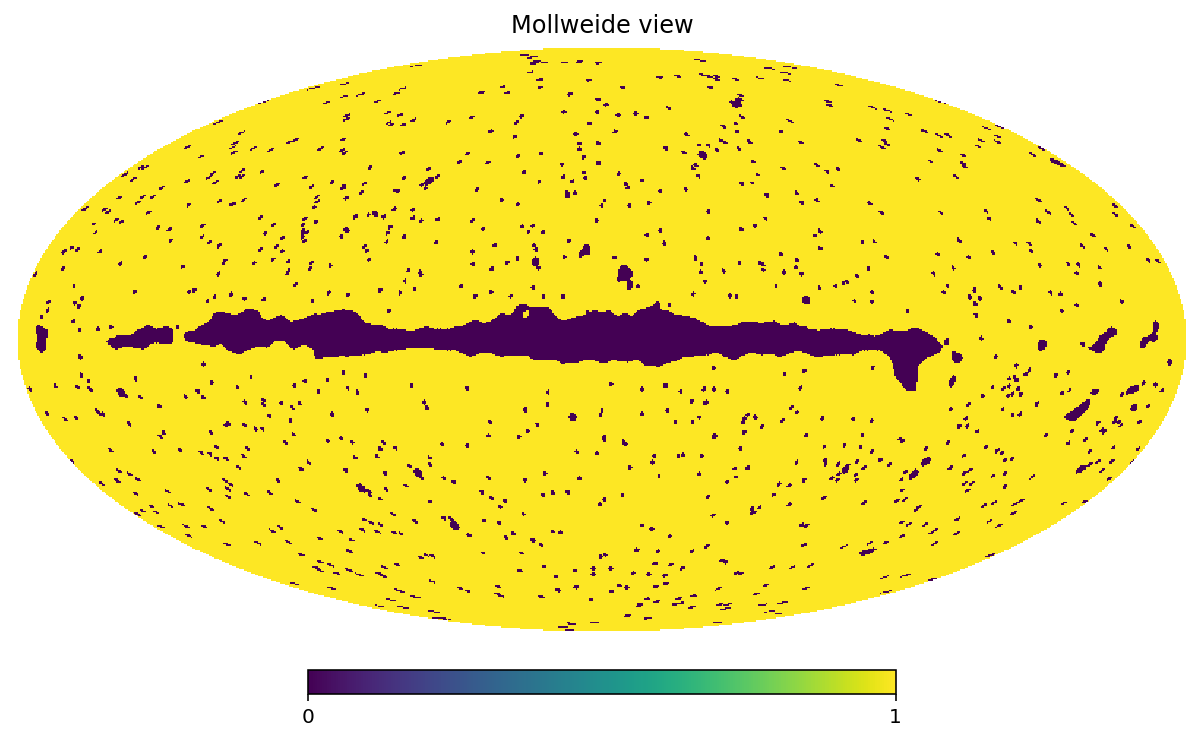

In [120]:
hp.mollview(mask_3)
plt.show()

In [121]:
# Resolution 
hp.get_nside(mask_3)

512

In [122]:
# Degrade the mask  until nside=256
mask_3=hp.pixelfunc.ud_grade(mask_3,256)

In [123]:
# HEALPix resolution parameter used here
nside = 256

In [124]:
# An NmtField object contains all the information describing the fields to correlate, including their observed maps, masks and contaminant templates.
t_3=nmt.NmtField(mask_3, [map_smica])

In [125]:
# Initialize binning scheme with 4 ells per bandpower
# Convenience constructor for HEALPix maps with linear binning.
b_3= nmt.NmtBin.from_nside_linear(nside, 4)

In [126]:
# Compute MASTER estimator
# spin-0 x spin-0
#Computes the full MASTER estimate of the power spectrum of two fields (f1 and f2). 
cl_30 = nmt.compute_full_master(t_3, t_3, b_3)

In [128]:
#Returns an array with the effective multipole associated to each bandpower. 
#These are computed as a weighted average of the multipoles within each bandpower.
el_3 = b_3.get_effective_ells()
el_3.shape


(191,)

(0.0, 2500.0)

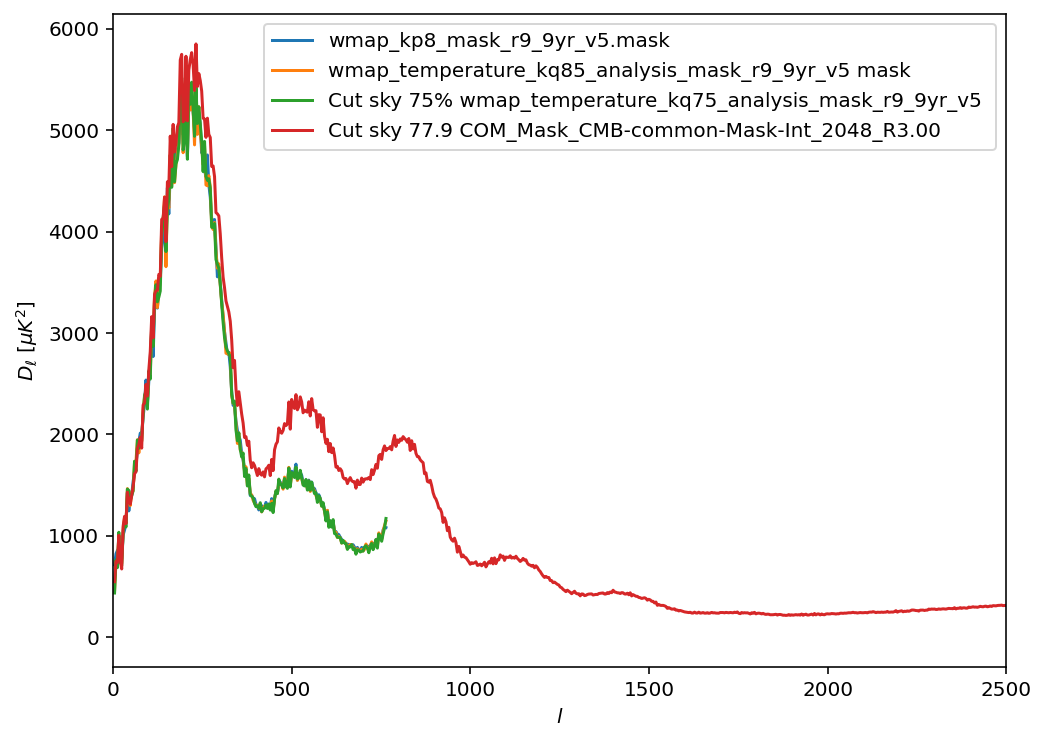

In [129]:

d3l=cl_30[0]*[(1e6)**(2)]*el_3*(el_3+1)/2/np.pi
# plot results

plt.figure(figsize=(8,6)) #size plot
plt.plot(el_3,d3l, label ='wmap_kp8_mask_r9_9yr_v5.mask')
plt.plot(el_2,d2l, label ='wmap_temperature_kq85_analysis_mask_r9_9yr_v5 mask')
plt.plot(el_1, d1l, label ='Cut sky 75% wmap_temperature_kq75_analysis_mask_r9_9yr_v5 ')
plt.plot(el,dl, label='Cut sky 77.9 COM_Mask_CMB-common-Mask-Int_2048_R3.00')
plt.legend(loc ='best')
plt.xlabel(r'$l$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.xlim(0,2500)

In [130]:
# Make un array to compute the correlation function

D3l=np.ones((len(d3l),4))
D3l[:,0]=d3l
D3l.shape

(191, 4)

In [131]:
# Computing the correlation function
corr_3, xvals, weights = correlations.gauss_legendre_correlation(D3l) 
xvals_=np.linspace(-1,1,191)
r_=np.arccos(xvals_)*180/np.pi # sampled theta values in degrees

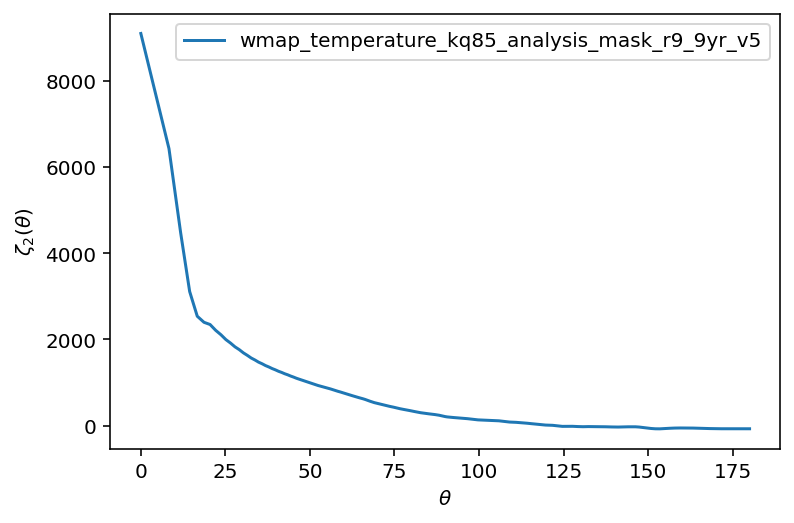

In [132]:
plt.plot(r_, corr_3[:,0], label = '')
plt.ylabel(r'$\zeta_{2}(\theta)$')
plt.xlabel(r'$\theta$')
plt.legend(loc='best')

(-400.0, 5000.0)

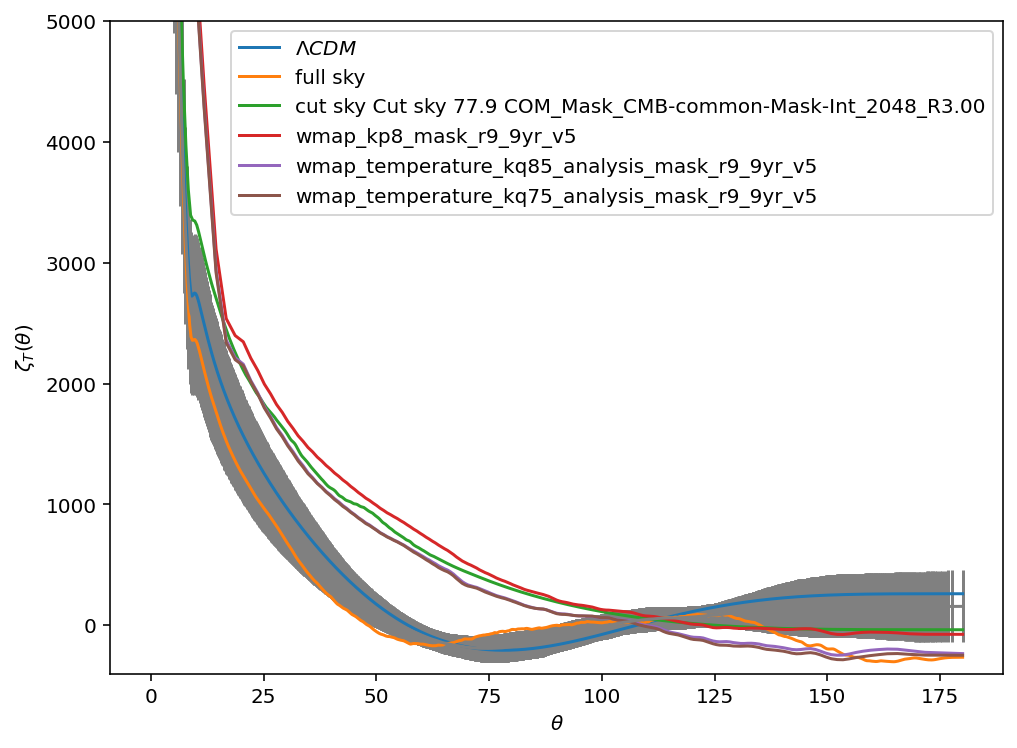

In [135]:
# Put the correlation function all together
plt.figure(figsize=(8,6)) # Plot size
plt.errorbar(r_1,media, yerr=sigma, color= 'grey')
plt.plot(r, corrs[:,0], label='$\Lambda CDM $')
plt.plot(r1, corr1[:,0], label ='full sky')
plt.plot(r2_1, corr2_1[:,0], label = 'cut sky Cut sky 77.9 COM_Mask_CMB-common-Mask-Int_2048_R3.00')
plt.plot(r_, corr_3[:,0], label = 'wmap_kp8_mask_r9_9yr_v5')
plt.plot(r_, corr_2[:,0], label = 'wmap_temperature_kq85_analysis_mask_r9_9yr_v5')
plt.plot(r_, corr_[:,0], label = 'wmap_temperature_kq75_analysis_mask_r9_9yr_v5')

plt.ylabel(r'$\zeta_{T}(\theta)$')
plt.xlabel(r'$\theta$')
plt.legend(loc='best')

plt.ylim(-400,5000)


In [142]:
# Interpolations
# I define the interpolation with x**3
f_1=interp1d(el_1, d1l, kind='cubic') 
f_2=interp1d(el_2, d2l, kind ='cubic')
f_3=interp1d(el_3, d3l, kind= 'cubic')

In [143]:
# I define my news l
lnew_1=np.linspace(4, 195, 191)
lnew_2=np.linspace(4, 195, 191)
lnew_3=np.linspace(4, 195, 191)

#pdl is the interpolated new function 
pdl_1=f_1(lnew_1)
pdl_2=f_1(lnew_2)
pdl_3=f_1(lnew_3)
lnew_3.shape

(191,)

In [144]:
# DL are arrays to compute the correlation function
DL_1=np.zeros((len(pdl_1),4))
DL_1[:,0]=pdl_1
DL_2=np.zeros((len(pdl_2),4))
DL_2[:,0]=pdl_2
DL_3=np.zeros((len(pdl_3),4))
DL_3[:,0]=pdl_3
DL_3.shape

(191, 4)

In [145]:
# Compute the correlation function

c_1, xvals, weights = correlations.gauss_legendre_correlation(DL_1)
c_2, xvals, weights = correlations.gauss_legendre_correlation(DL_2)
c_3, xvals, weights = correlations.gauss_legendre_correlation(DL_3)
xvals_=np.linspace(-1,1,191)
r_=np.arccos(xvals_)*180/np.pi # sampled theta values in degrees


(-400.0, 5000.0)

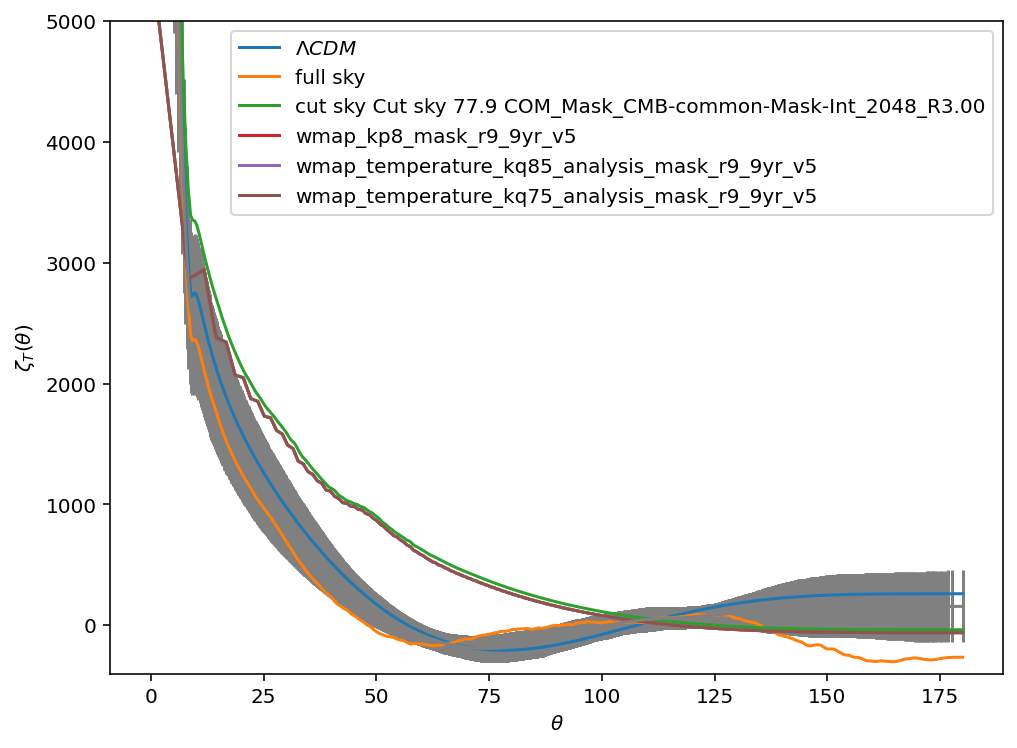

In [146]:
# Put the correlation function all together
plt.figure(figsize=(8,6)) # Plot size
plt.errorbar(r_1,media, yerr=sigma, color= 'grey')
plt.plot(r, corrs[:,0], label='$\Lambda CDM $')
plt.plot(r1, corr1[:,0], label ='full sky')
plt.plot(r2_1, corr2_1[:,0], label = 'cut sky Cut sky 77.9 COM_Mask_CMB-common-Mask-Int_2048_R3.00')
plt.plot(r_, c_3[:,0], label = 'wmap_kp8_mask_r9_9yr_v5')
plt.plot(r_, c_2[:,0], label = 'wmap_temperature_kq85_analysis_mask_r9_9yr_v5')
plt.plot(r_, c_1[:,0], label = 'wmap_temperature_kq75_analysis_mask_r9_9yr_v5')

plt.ylabel(r'$\zeta_{T}(\theta)$')
plt.xlabel(r'$\theta$')
plt.legend(loc='best')

plt.ylim(-400,5000)
